/**********************************************************************************
 * Copyright (c) 2023 Process Systems Engineering (AVT.SVT), RWTH Aachen University
 *
 * This program and the accompanying materials are made available under the
 * terms of the Eclipse Public License 2.0 which is available at
 * http://www.eclipse.org/legal/epl-2.0.
 *
 * SPDX-License-Identifier: EPL-2.0
 *
 * The source code can be found here:
 * https://github.com/iAMB-RWTH-Aachen/Ustilago_maydis-GEM/tree/master/data/AcetateCofeed
 
 **********************************************************************************/


Date: 04.02.2023 <br/>
File name: Growth rate over the relative acetate carbon uptake.ipynb <br/>
Description: This script provides the FBA computations of the growth rate for a carbon share of acetate to glucose from 0 to 100% (cf. Figure 4a in the original manuscript).
The COBRApy package (https://doi.org/10.1186/1752-0509-7-74  ) is used to together with the solver Gurobi 9.5.2 to solve the 
linear programming problems. <br/>
@authors: Manuel Boßmann, Anita Ziegler, Ulf Liebal, Alexander Mitsos

In [1]:
from os.path import join


# loading cobrapy, a library dedicated to the analysis of genome scale metabolic models
from cobra.io import read_sbml_model

# loading matplotlib, a library for visualization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#load iUma22v1.1.xml model
ModelFile = join('..', '..','model','iUma22v1.1.xml')
model=read_sbml_model(ModelFile)

In [3]:
#Simulate biomass growth with different acetate and glucose fluxes and constant amount of C atoms

model.objective = "BIOMASS_REACTION"
total_c_flux = 13.2
ace_rel = []
growth_rate = []

for x in range(0,93,1):
    ac = round(x*total_c_flux/(2*100), 5)
    glc = round(1/6*(total_c_flux-2*ac), 4)


    model.reactions.EX_glc__D_e.upper_bound = -glc
    model.reactions.EX_glc__D_e.lower_bound = -glc
    model.reactions.EX_ac_e.lower_bound = -ac
    model.reactions.EX_ac_e.upper_bound = -ac


    solution = model.optimize()
    

    ace_rel.append(x)
    growth_rate.append(round(solution.fluxes.BIOMASS_REACTION,4))


    

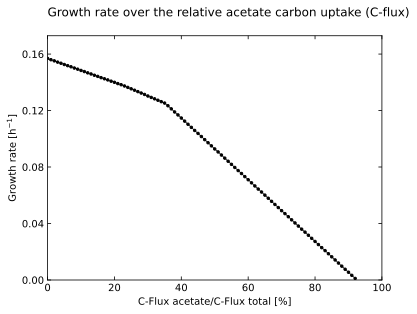

In [4]:
#create the graph
fig, ax = plt.subplots(figsize = (6,4.5))

ax.set_title("Growth rate over the relative acetate carbon uptake (C-flux)\n", loc = "left")
ax.set_xlabel('C-Flux acetate/C-Flux total [$\%$]')
ax.set_ylabel('Growth rate [h$^{-1}$]')
ax.set_xlim([0, 100])
ax.set_ylim([0, 0.173])
ax.set_yticks([0, 0.04, 0.08, 0.12, 0.16])
ax.tick_params(direction = "in", top = True, right = True)

ax.plot(ace_rel, growth_rate, linestyle='-', marker='o', markersize= 2.5, linewidth = 0.7, color='black')
plt.show()